In [1]:
import numpy as np 
import cv2
import matplotlib.pyplot as plt

### Ej1:
Dada una imagen y un valor entero: 2, 3 o 4 muestre la imagen obtenida de multiplicarla por alguno de esos valores.

In [27]:
ruta1 = 'Imagenes_para_contraste/asteroid.jpg'
img = cv2.imread(ruta1,cv2.IMREAD_GRAYSCALE)
if img is None: 
    print("Error ruta no valida")
    exit()
print(img.shape)
print(np.iinfo(img.dtype).max)
print()

(1000, 683)
255



In [2]:
def f1(ruta:str, factor:int): 
    img = cv2.imread(ruta,cv2.IMREAD_GRAYSCALE)
    if img is None: 
        print("Error ruta no valida")
        exit()
    img_res = img * factor
    cv2.imshow('Original',img)
    cv2.imshow(f'Multiplicada por {factor}',img_res)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [3]:
ruta1 = 'Imagenes_para_contraste/asteroid.jpg'
f1(ruta1,6)

### Ej2 
Implementar una función que dada una imagen devuelva su negativo.

In [4]:
def f2(ruta:str): 
    img = cv2.imread(ruta,cv2.IMREAD_GRAYSCALE)
    if img is None: 
        print("Error ruta no valida")
        exit()
    negativo = np.iinfo(img.dtype).max - img
    cv2.imshow("Negativo",negativo)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [5]:
f2(ruta1)

# Ej3 
Implementar una función que dada una imagen devuelva el histograma de niveles de gris.

In [28]:
def f3(ruta:str, mostrar:bool=False):
    img = cv2.imread(ruta,cv2.IMREAD_GRAYSCALE)
    if img is None: 
        print("Error ruta no valida")
        exit()
    bins = np.iinfo(img.dtype).max+1 
    X,Y = img.shape
    histogram = np.zeros(bins)
    for i in range(X):
        for j in range(Y): 
            gris = img[i,j]
            histogram[gris] += 1
    if mostrar :
        plt.plot(histogram, color='red')
        plt.title('Histograma de Niveles de Gris')
        plt.xlabel('Nivel de Gris')
        plt.ylabel('Cantidad de Píxeles')
        plt.xlim([0,bins-1])
        plt.show()
    return histogram

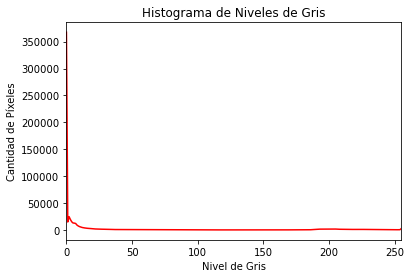

(256,)

In [30]:
f3(ruta1,mostrar = True)

### Ej4
Examinando el histograma, implementar una función que devuelva una imagen que tenga aumento del contraste.

In [7]:
def f4(ruta:str):
    img = cv2.imread(ruta,cv2.IMREAD_GRAYSCALE)
    if img is None: 
        print("Error ruta no valida")
        exit()
    

### Ej5
Implementar una función que dada una imagen y un valor de umbral devuelva una imagen binarizada.

In [8]:
def f5(ruta:str, umbral:int):
    """
    Suponemos que umbral esta en rango correspondiente.
    """
    img = cv2.imread(ruta,cv2.IMREAD_GRAYSCALE)
    if img is None: 
        print("Error ruta no valida")
        exit()
    bin_img = (img >= umbral) * (np.iinfo(np.iinfo(img.dtype)).max+1)
    return bin_img

### Ej6 
Implementar una función que dada una imagen muestre el histograma original y el histograma
equalizado.

In [9]:
arry = np.array([0,0.5,1,1])
arrx = np.array([.25,.5,.75,1])

def f(n,arry,arrx): 
    return np.argmax(arry-arrx[n]>=0)

def salida(arx, ary):
    res = np.ones(len(arx))
    for i in range(len(arx)): 
        res[i] = np.argmax(ary-arx[i]>=0)
    return res

In [10]:
[(i+1)/4 for i in range(4)]

[0.25, 0.5, 0.75, 1.0]

In [48]:
Y = [(i+1)/256 for i in range(255)] # cdf de una uniforme. 
def equalization2(arx,ary): 
    n = len(arx)
    res = np.zeros(n)
    for i in range(n): 
        res[i] = ary[np.argmax(ary-arx[i]>=0)]
    
    return res

def equalization(cdf,l): 
    smin = cdf[0]
    #hist_equ = zeros(len(cdf))
    # for i in range(len(cdf)): 
    #     hist_equ[i] = 
    ss = np.floor((cdf-smin)/(1-smin) * l + 0.5).astype(int)
    hist_equ = np.bincount(ss,minlength=l)
    
    return hist_equ

def f6(ruta:str, mostrar:bool=False):
    hist_original = f3(ruta)
    img = cv2.imread(ruta,cv2.IMREAD_GRAYSCALE)
    if img is None: 
        print("Error ruta no valida")
        exit()
    bins = np.iinfo(img.dtype).max + 1
    #N = img.size
    cdf = hist_original.cumsum() / img.size
    hist_equ = equalization(hist_original,bins-1)
    #hist_equ = equalization2(cdf,Y)
    #print(hist_original.size)
    if mostrar :
        plt.plot(hist_equ, color='red')
        plt.title('Histograma de Niveles de Gris')
        plt.xlabel('Nivel de Gris')
        plt.ylabel('Cantidad de Píxeles')
        plt.xlim([0,bins-1])
        plt.show()
    return hist_equ

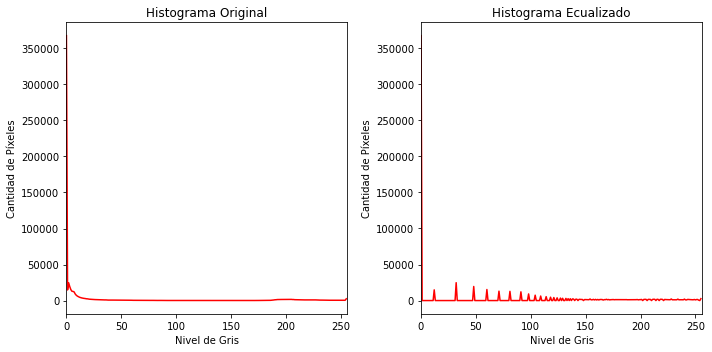

In [23]:
img = cv2.imread(ruta1,cv2.IMREAD_GRAYSCALE)
img_equalizada = cv2.equalizeHist(img)

# Calcular el histograma original y el ecualizado
hist_original = cv2.calcHist([img], [0], None, [256], [0, 256])
hist_equalizado = cv2.calcHist([img_equalizada], [0], None, [256], [0, 256])

# Mostrar los histogramas
plt.figure(figsize=(10,5))

plt.subplot(1, 2, 1)
plt.plot(hist_original, color='red')
plt.title('Histograma Original')
plt.xlabel('Nivel de Gris')
plt.ylabel('Cantidad de Píxeles')
plt.xlim([0, 256])

plt.subplot(1, 2, 2)
plt.plot(hist_equalizado, color='red')
plt.title('Histograma Ecualizado')
plt.xlabel('Nivel de Gris')
plt.ylabel('Cantidad de Píxeles')
plt.xlim([0, 256])

plt.tight_layout()
plt.show()

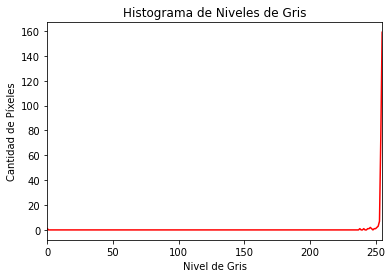

array([  1,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [49]:
f6(ruta1,mostrar=True)
#f3(ruta1,mostrar=True)
#len(Y)

### Ej7 
Dada una imagen a la cual se le ecualizo su histograma, aplicar la ecualizacion del histograma por segunda vez a la misma imagen. Observar el resultado y dar una explicacion de lo sucedido.

In [27]:
def f7(ruta:str, mostrar:bool= False): 
    img = cv2.imread(ruta,cv2.IMREAD_GRAYSCALE)
    if img is None: 
        print("Error ruta no valida")
        exit()
    max_val = np.iinfo(img.dtype).max   
    histogram = f3(ruta)
    # primera equalizacion 
    hist_equ = equalization(histogram,max_val,img.size)
    # segunda equalization
    hist2_equa = equalization(hist_equ,max_val,img.size)
    if mostrar :
        plt.plot(hist2_equa, color='red')
        plt.title('Histograma de Niveles de Gris')
        plt.xlabel('Nivel de Gris')
        plt.ylabel('Cantidad de Píxeles')
        plt.xlim([0,max_val])
        plt.show()
    return hist2_equa

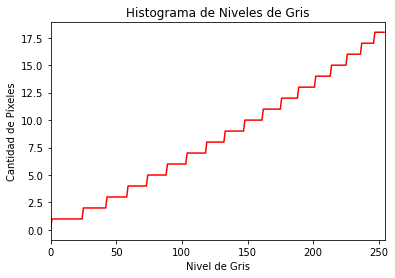

array([ 0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  2.,
        2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,
        2.,  2.,  2.,  2.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,
        3.,  3.,  3.,  3.,  3.,  3.,  3.,  4.,  4.,  4.,  4.,  4.,  4.,
        4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  5.,  5.,  5.,  5.,
        5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  6.,  6.,
        6.,  6.,  6.,  6.,  6.,  6.,  6.,  6.,  6.,  6.,  6.,  6.,  6.,
        7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,
        7.,  7.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,
        8.,  8.,  8.,  9.,  9.,  9.,  9.,  9.,  9.,  9.,  9.,  9.,  9.,
        9.,  9.,  9.,  9.,  9., 10., 10., 10., 10., 10., 10., 10., 10.,
       10., 10., 10., 10., 10., 10., 11., 11., 11., 11., 11., 11., 11.,
       11., 11., 11., 11., 11., 11., 11., 12., 12., 12., 12., 12

In [28]:
f7(ruta1,mostrar=True)

### Ej8 

In [135]:
img = cv2.imread(ruta1,cv2.IMREAD_GRAYSCALE)
img.size

683000